In [ ]:
pip install pandas numpy  seaborn missingno matplotlib scikit-learn joblib

In [1]:

import pandas as pd
import json
import os
import missingno as ms
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl

In [2]:
dataCsvPath = os.path.join("..","results.csv")
raw_data_df = pd.read_csv(dataCsvPath)
src_paths = list(raw_data_df["src_path"])

print("Number of rows:", raw_data_df.shape[0])
print("Number of columns:", raw_data_df.shape[1])
print("Column names:", list(raw_data_df.columns))

Number of rows: 3921
Number of columns: 22
Column names: ['model_name', 'src_path', 'conv_path', 'src_ext', 'is_parsed', 'is_sys_design', 'sys_name', 'no_components', 'no_connectors', 'no_hardware_comp', 'understandability', 'no_size', 'no_data_comp', 'no_software_comp', 'no_sys_comp', 'coupling', 'cohesion', 'complexity', 'graph_density', 'avg_shortest_path', 'avg_deg_cent', 'doc_files']


## Cleaning the data, filtering the non parsed models and removing some columns

In [3]:
raw_data_df = raw_data_df[(raw_data_df["is_parsed"] == True) & (raw_data_df["is_sys_design"] == True)]
data_df = raw_data_df.loc[:, ~raw_data_df.columns.isin(['src_path', 'conv_path',"src_ext","doc_files"])]
print("Number of rows:", raw_data_df.shape[0])
print("Number of columns:", raw_data_df.shape[1])
data_df.head(10)

Number of rows: 3201
Number of columns: 22


model_name  is_parsed  is_sys_design  \
0            aadlbook::integration       True           True   
1            aadlbook::integration       True           True   
2            aadlbook::integration       True           True   
3   aadlbook::component_definition       True           True   
4                 use_myproperties       True           True   
5                 use_myproperties       True           True   
6       aadlbook::flows_definition       True           True   
8                 Basic_AFDX_Model       True           True   
9                 Basic_AFDX_Model       True           True   
10                Basic_AFDX_Model       True           True   

                              sys_name  no_components  no_connectors  \
0      integration_functional_Instance           26.0           30.0   
1      integration_variation1_Instance           31.0           38.0   
2      integration_variation2_Instance           29.0           34.0   
3               integration_i_Instance           10.0            6.0   
4      integration_with_units_Instance            3.0            0.0   
5   integration_without_units_Instance            3.0            0.0   
6               integration_i_Instance           10.0            6.0   
8          Basic_AFDX_Model_i_Instance           33.0           20.0   
9               HW_Platform_i_Instance           19.0           14.0   
10                   Module_i_Instance            4.0            3.0   

    no_hardware_comp  understandability  no_size  no_data_comp  \
0               11.0           0.046154     56.0           0.0   
1               16.0           0.040860     69.0           0.0   
2               14.0           0.041872     63.0           0.0   
3                3.0           0.066667     16.0           0.0   
4                2.0           0.000000      3.0           0.0   
5                2.0           0.000000      3.0           0.0   
6                3.0           0.066667     16.0           0.0   
8               15.0           0.018939     53.0           0.0   
9               15.0           0.040936     33.0           0.0   
10               3.0           0.250000      7.0           0.0   

    no_software_comp  no_sys_comp   coupling  cohesion  complexity  \
0               14.0          1.0  13.083333  0.100000        54.0   
1               14.0          1.0  15.083333  0.087356        54.0   
2               14.0          1.0  14.083333  0.089947        54.0   
3                6.0          1.0   5.000000  0.166667         2.0   
4                0.0          1.0   0.000000  0.000000         0.0   
5                0.0          1.0   0.000000  0.000000         0.0   
6                6.0          1.0   5.000000  0.166667         2.0   
8               12.0          6.0  13.500000  0.040323         4.0   
9                0.0          4.0  11.000000  0.091503         0.0   
10               0.0          1.0   2.000000  1.000000         0.0   

    graph_density  avg_shortest_path  avg_deg_cent  
0        1.200000           0.580000      0.055385  
1        1.266667           0.448387      0.047312  
2        1.214286           0.474138      0.049261  
3        0.666667           0.444444      0.111111  
4        0.000000           0.000000      0.000000  
5        0.000000           0.000000      0.000000  
6        0.666667           0.444444      0.111111  
8        0.625000           0.017992      0.017992  
9        0.777778           0.040936      0.040936  
10       1.000000           0.416667      0.250000

## Extracting the String Data and Creating a Data Set for that

In [4]:
text_models_data = raw_data_df.loc[:,raw_data_df.columns.isin(["model_name","graph_str_rep","doc_files"])]
text_models_data = text_models_data.drop_duplicates()
text_models_data.to_csv("data_text.csv",index=True)

## Exploratory analysis

In [5]:
df_num = data_df.loc[:, ~data_df.columns.isin(["is_parsed","is_sys_design"])]
df_num.head()

model_name                         sys_name  \
0           aadlbook::integration  integration_functional_Instance   
1           aadlbook::integration  integration_variation1_Instance   
2           aadlbook::integration  integration_variation2_Instance   
3  aadlbook::component_definition           integration_i_Instance   
4                use_myproperties  integration_with_units_Instance   

   no_components  no_connectors  no_hardware_comp  understandability  no_size  \
0           26.0           30.0              11.0           0.046154     56.0   
1           31.0           38.0              16.0           0.040860     69.0   
2           29.0           34.0              14.0           0.041872     63.0   
3           10.0            6.0               3.0           0.066667     16.0   
4            3.0            0.0               2.0           0.000000      3.0   

   no_data_comp  no_software_comp  no_sys_comp   coupling  cohesion  \
0           0.0              14.0          1.0  13.083333  0.100000   
1           0.0              14.0          1.0  15.083333  0.087356   
2           0.0              14.0          1.0  14.083333  0.089947   
3           0.0               6.0          1.0   5.000000  0.166667   
4           0.0               0.0          1.0   0.000000  0.000000   

   complexity  graph_density  avg_shortest_path  avg_deg_cent  
0        54.0       1.200000           0.580000      0.055385  
1        54.0       1.266667           0.448387      0.047312  
2        54.0       1.214286           0.474138      0.049261  
3         2.0       0.666667           0.444444      0.111111  
4         0.0       0.000000           0.000000      0.000000

### Filtering by size >= 3 and removing the very big repos

In [6]:
df_num[(df_num["no_size"] < 3)].shape

(881, 16)

In [7]:
df_num = df_num[(df_num["no_size"] >= 3)]
df_num = df_num[(df_num["no_components"] < 32479)]
df_num = df_num[(df_num["no_connectors"] < 350)]

### Droping duplicates with build-in

In [8]:
df_num.drop_duplicates(inplace=True)
df_num

model_name                              sys_name  \
0              aadlbook::integration       integration_functional_Instance   
1              aadlbook::integration       integration_variation1_Instance   
2              aadlbook::integration       integration_variation2_Instance   
3     aadlbook::component_definition                integration_i_Instance   
4                   use_myproperties       integration_with_units_Instance   
...                              ...                                   ...   
3913                        CASE_Toy            UAVToySystem_Impl_Instance   
3914                CruiseController  CruiseControllerSystem_Impl_Instance   
3915                             UAS                     UAS_Impl_Instance   
3917                      HawkeyeUAV               UAVSystem_Impl_Instance   
3920                              MC         MissionComputer_Impl_Instance   

      no_components  no_connectors  no_hardware_comp  understandability  \
0              26.0           30.0              11.0           0.046154   
1              31.0           38.0              16.0           0.040860   
2              29.0           34.0              14.0           0.041872   
3              10.0            6.0               3.0           0.066667   
4               3.0            0.0               2.0           0.000000   
...             ...            ...               ...                ...   
3913            7.0           16.0               0.0           0.380952   
3914            4.0           15.0               0.0           1.250000   
3915           25.0           26.0              12.0           0.043333   
3917           12.0           34.0               0.0           0.257576   
3920           11.0           26.0               5.0           0.236364   

      no_size  no_data_comp  no_software_comp  no_sys_comp   coupling  \
0        56.0           0.0              14.0          1.0  13.083333   
1        69.0           0.0              14.0          1.0  15.083333   
2        63.0           0.0              14.0          1.0  14.083333   
3        16.0           0.0               6.0          1.0   5.000000   
4         3.0           0.0               0.0          1.0   0.000000   
...       ...           ...               ...          ...        ...   
3913     23.0           0.0               0.0          7.0   3.933333   
3914     19.0           0.0               0.0          4.0   2.111111   
3915     51.0           0.0               8.0          5.0  12.338095   
3917     46.0           0.0               0.0         12.0   5.911905   
3920     37.0           0.0               5.0          1.0   6.066667   

      cohesion  complexity  graph_density  avg_shortest_path  avg_deg_cent  
0     0.100000        54.0       1.200000           0.580000      0.055385  
1     0.087356        54.0       1.266667           0.448387      0.047312  
2     0.089947        54.0       1.214286           0.474138      0.049261  
3     0.166667         2.0       0.666667           0.444444      0.111111  
4     0.000000         0.0       0.000000           0.000000      0.000000  
...        ...         ...            ...                ...           ...  
3913  1.066667        41.0       2.666667           1.309524      0.214286  
3914  5.000000        18.0       5.000000           0.500000      0.500000  
3915  0.094203        75.0       1.083333           1.553333      0.061667  
3917  0.618182        51.0       3.090909           1.090909      0.204545  
3920  0.577778        40.0       2.600000           2.390909      0.200000  

[1862 rows x 16 columns]

## Visualization, metrics and statistics over the data

<AxesSubplot: title={'center': 'Missing Values'}>

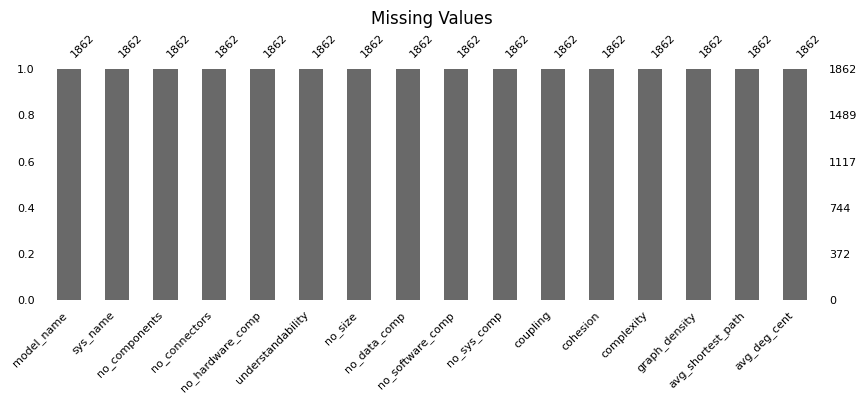

In [9]:
# Missing values
plt.title("Missing Values", fontsize=12)
ms.bar(df_num,fontsize=8,figsize=(10,3))

## Distribution for numerical metrics

### Description for the size parametter

In [11]:
df_num[["no_size"]].describe()

no_size
count  1862.000000
mean     15.368958
std      24.738020
min       3.000000
25%       5.000000
50%       7.000000
75%      15.000000
max     302.000000

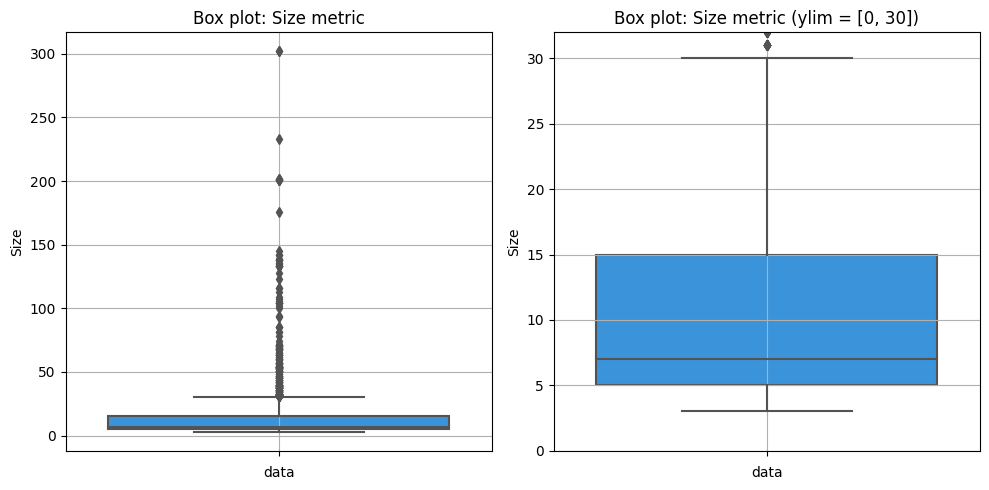

In [13]:

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(y=df_num['no_size'], color='#2196f3', showfliers=True, ax=axs[0])
axs[0].set_xlabel('data')
axs[0].set_ylabel('Size')
axs[0].set_title('Box plot: Size metric')
axs[0].grid()

sns.boxplot(y=df_num['no_size'], color='#2196f3', showfliers=True, ax=axs[1])
axs[1].set_xlabel('data')
axs[1].set_ylabel('Size')
axs[1].set_title('Box plot: Size metric (ylim = [0, 30])')
axs[1].grid()
axs[1].set_ylim([0, 32])

fig.tight_layout()
plt.show()

In [ ]:
pd.set_option("display.max_colwidth", None)
df_num[df_num["no_size"] == 302]["src_path"]

In [ ]:
df_num[df_num["no_size"] == 3]["src_path"]

### Description for the complexity parametter

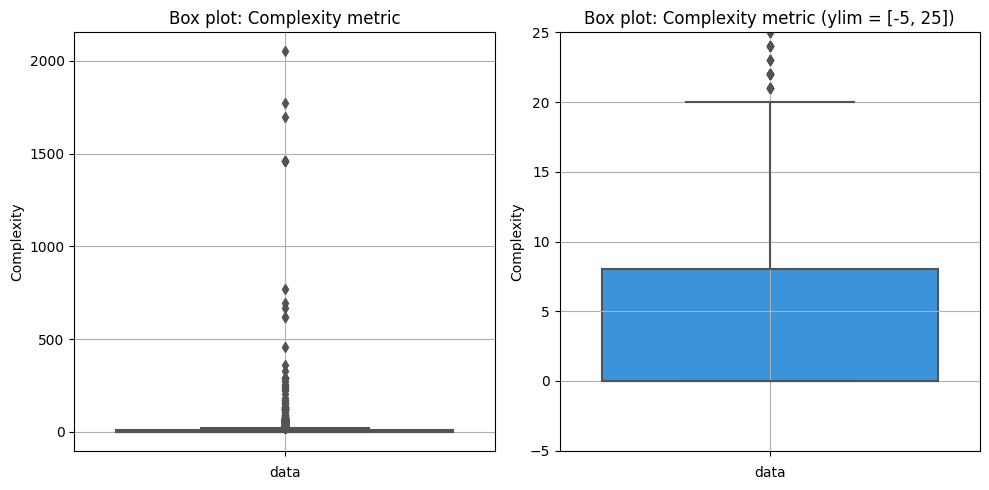

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(y=df_num['complexity'], color='#2196f3', showfliers=True, ax=axs[0])
axs[0].set_xlabel('data')
axs[0].set_ylabel('Complexity')
axs[0].set_title('Box plot: Complexity metric')
axs[0].grid()

sns.boxplot(y=df_num['complexity'], color='#2196f3', showfliers=True, ax=axs[1])
axs[1].set_xlabel('data')
axs[1].set_ylabel('Complexity')
axs[1].set_title('Box plot: Complexity metric (ylim = [-5, 25])')
axs[1].grid()
axs[1].set_ylim([-5, 25])

fig.tight_layout()
plt.show()

In [16]:
df_num[["complexity"]].describe()

complexity
count  1862.000000
mean     21.005371
std     115.467798
min       0.000000
25%       0.000000
50%       0.000000
75%       8.000000
max    2052.000000

In [ ]:
pd.set_option("display.max_colwidth", None)
data_df[data_df["complexity"] == 2052]["src_path"]

### Distributions for amount of category of the components

In [ ]:
df_num[["no_hardware_comp"]].sum()

In [ ]:
df_num[["no_software_comp"]].describe()

In [ ]:
df_num[["no_data_comp"]].describe()

([<matplotlib.patches.Wedge at 0x7f7ff8dd4610>,
 [Text(-0.008626100497249076, 1.0999661769300961, 'Hardware Components'),
  Text(-0.316931050268581, -1.05335402850877, 'Software Components'),
  Text(1.050836310315932, -0.32518156300995704, 'Data Components')],
 [Text(-0.0047051457257722236, 0.5999815510527796, '50.2%'),
  Text(-0.17287148196468052, -0.5745567428229653, '40.2%'),
  Text(0.5731834419905082, -0.17737176164179472, '9.6%')])

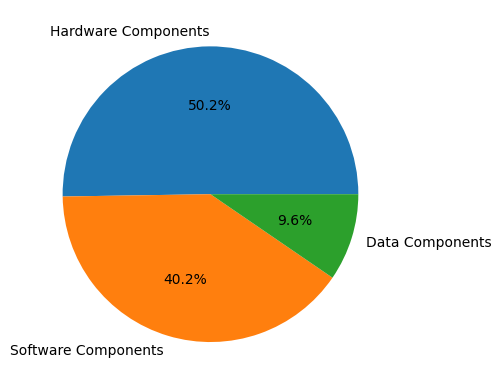

In [17]:
# create data
hardware_comp = df_num["no_hardware_comp"].sum()
software_comp = df_num["no_software_comp"].sum()
data_comp = df_num["no_data_comp"].sum()

labels = 'Hardware Components', 'Software Components', 'Data Components'

sizes = [hardware_comp, software_comp, data_comp]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels,autopct='%1.1f%%')


### Distribution for cohesion, coupling

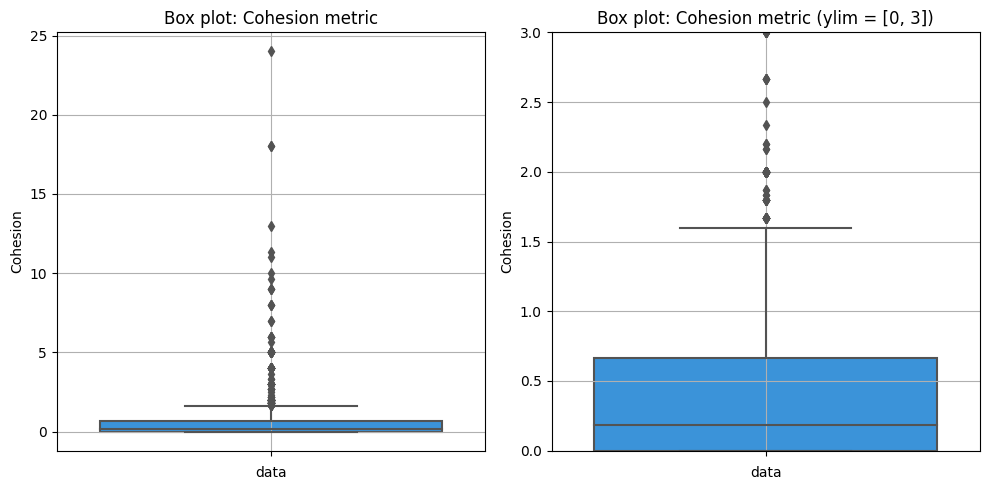

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(y=df_num['cohesion'], color='#2196f3', showfliers=True, ax=axs[0])
axs[0].set_xlabel('data')
axs[0].set_ylabel('Cohesion')
axs[0].set_title('Box plot: Cohesion metric')
axs[0].grid()

sns.boxplot(y=df_num['cohesion'], color='#2196f3', showfliers=True, ax=axs[1])
axs[1].set_xlabel('data')
axs[1].set_ylabel('Cohesion')
axs[1].set_title('Box plot: Cohesion metric (ylim = [0, 3])')
axs[1].grid()
axs[1].set_ylim([0, 3])

fig.tight_layout()
plt.show()

In [20]:
df_num[["cohesion"]].describe()

cohesion
count  1862.000000
mean      0.625125
std       1.427185
min       0.000000
25%       0.000000
50%       0.181818
75%       0.666667
max      24.000000

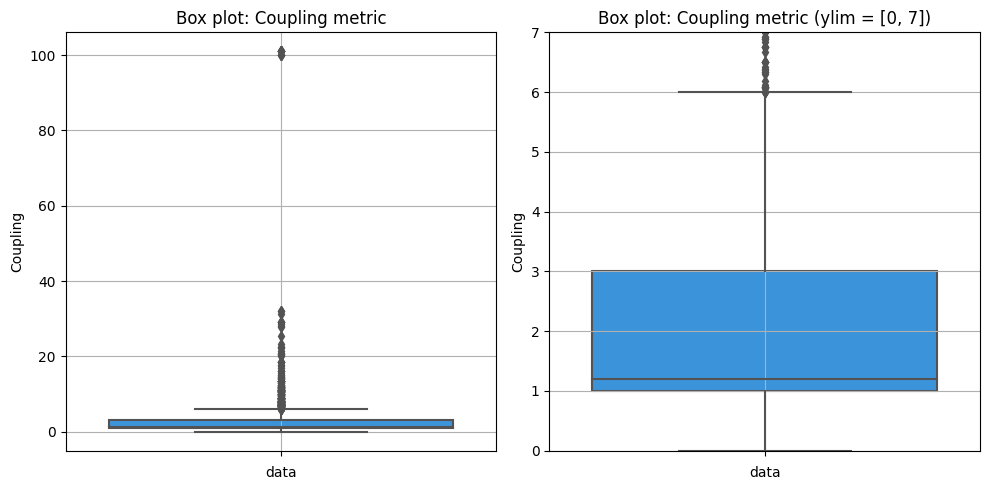

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(y=df_num['coupling'], color='#2196f3', showfliers=True, ax=axs[0])
axs[0].set_xlabel('data')
axs[0].set_ylabel('Coupling')
axs[0].set_title('Box plot: Coupling metric')
axs[0].grid()

sns.boxplot(y=df_num['coupling'], color='#2196f3', showfliers=True, ax=axs[1])
axs[1].set_xlabel('data')
axs[1].set_ylabel('Coupling')
axs[1].set_title('Box plot: Coupling metric (ylim = [0, 7])')
axs[1].grid()
axs[1].set_ylim([0, 7])

fig.tight_layout()
plt.show()

In [22]:
df_num[["coupling"]].describe()

coupling
count  1862.000000
mean      3.222332
std       8.748431
min       0.000000
25%       1.000000
50%       1.200000
75%       3.000000
max     101.000000

### Distributions for graph metrics graph_density, avg_shortest_path, avg_clust_coeff, avg_deg_cent

(0.0, 800.0)

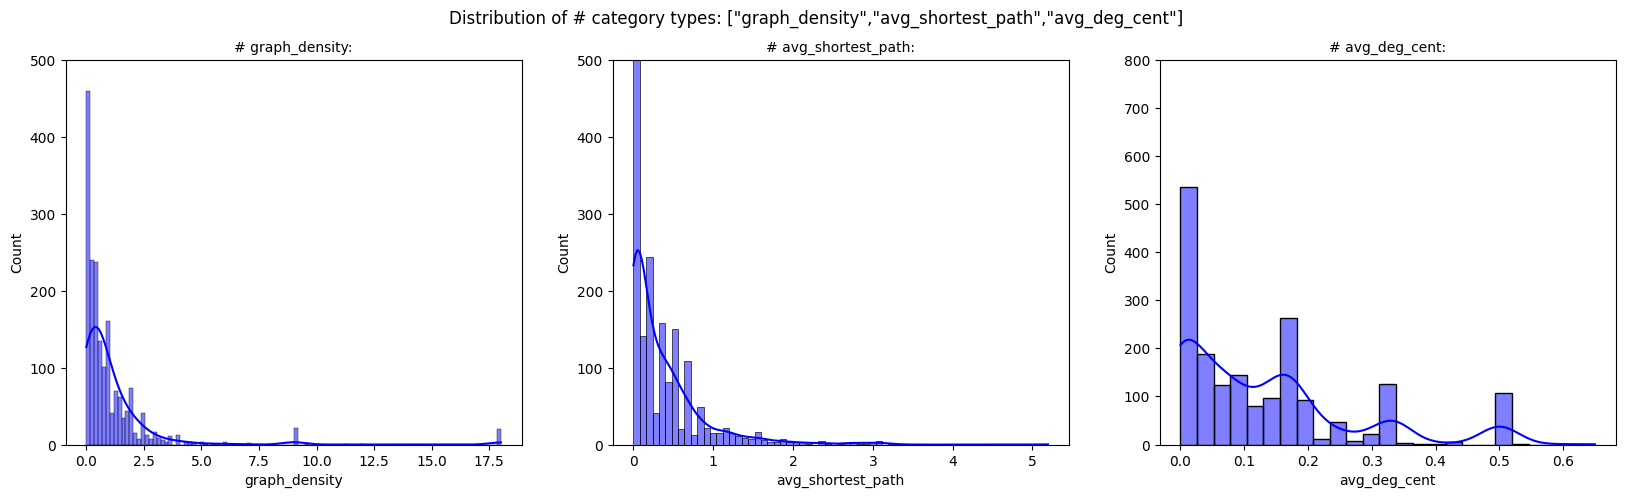

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Distribution of # category types: ["graph_density","avg_shortest_path","avg_deg_cent"]',fontsize=12)
axes[0].set_title('# graph_density:',fontsize=10)
axes[1].set_title('# avg_shortest_path:',fontsize=10)
axes[2].set_title('# avg_deg_cent:',fontsize=10)
sns.histplot(ax=axes[0],data=df_num['graph_density'],kde=True,color='blue');
sns.histplot(ax=axes[1],data=df_num['avg_shortest_path'],kde=True,color='blue');
sns.histplot(ax=axes[2],data=df_num['avg_deg_cent'],kde=True,color='blue');
axes[0].set_ylim([0, 500])
axes[1].set_ylim([0, 500])
axes[2].set_ylim([0, 800])

### Description for avg_shortest_path, graph_density, avg_deg_cent, avg_clust_coeff

<AxesSubplot: >

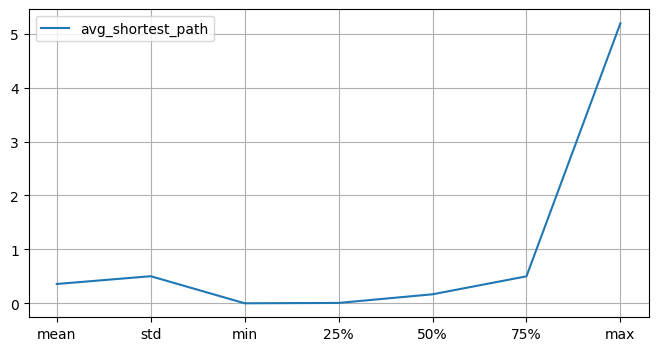

In [27]:
plt.figure(figsize=(8,4))
plt.grid()
sns.lineplot(data=df_num[["avg_shortest_path"]].describe().drop("count",axis=0))

<AxesSubplot: >

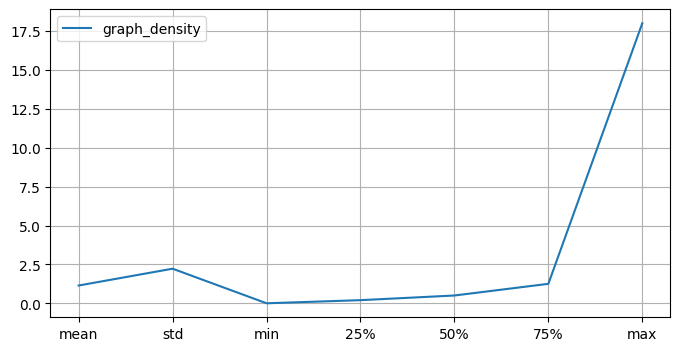

In [28]:
plt.figure(figsize=(8,4))
plt.grid()
sns.lineplot(data=df_num[["graph_density"]].describe().drop("count",axis=0))

<AxesSubplot: >

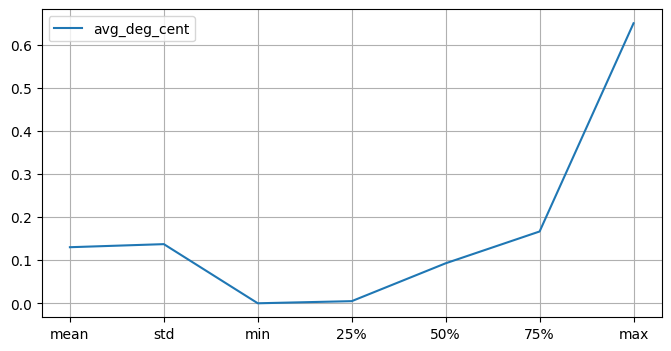

In [29]:
plt.figure(figsize=(8,4))
plt.grid()
sns.lineplot(data=df_num[["avg_deg_cent"]].describe().drop("count",axis=0))

## Trying to get reelation between variables

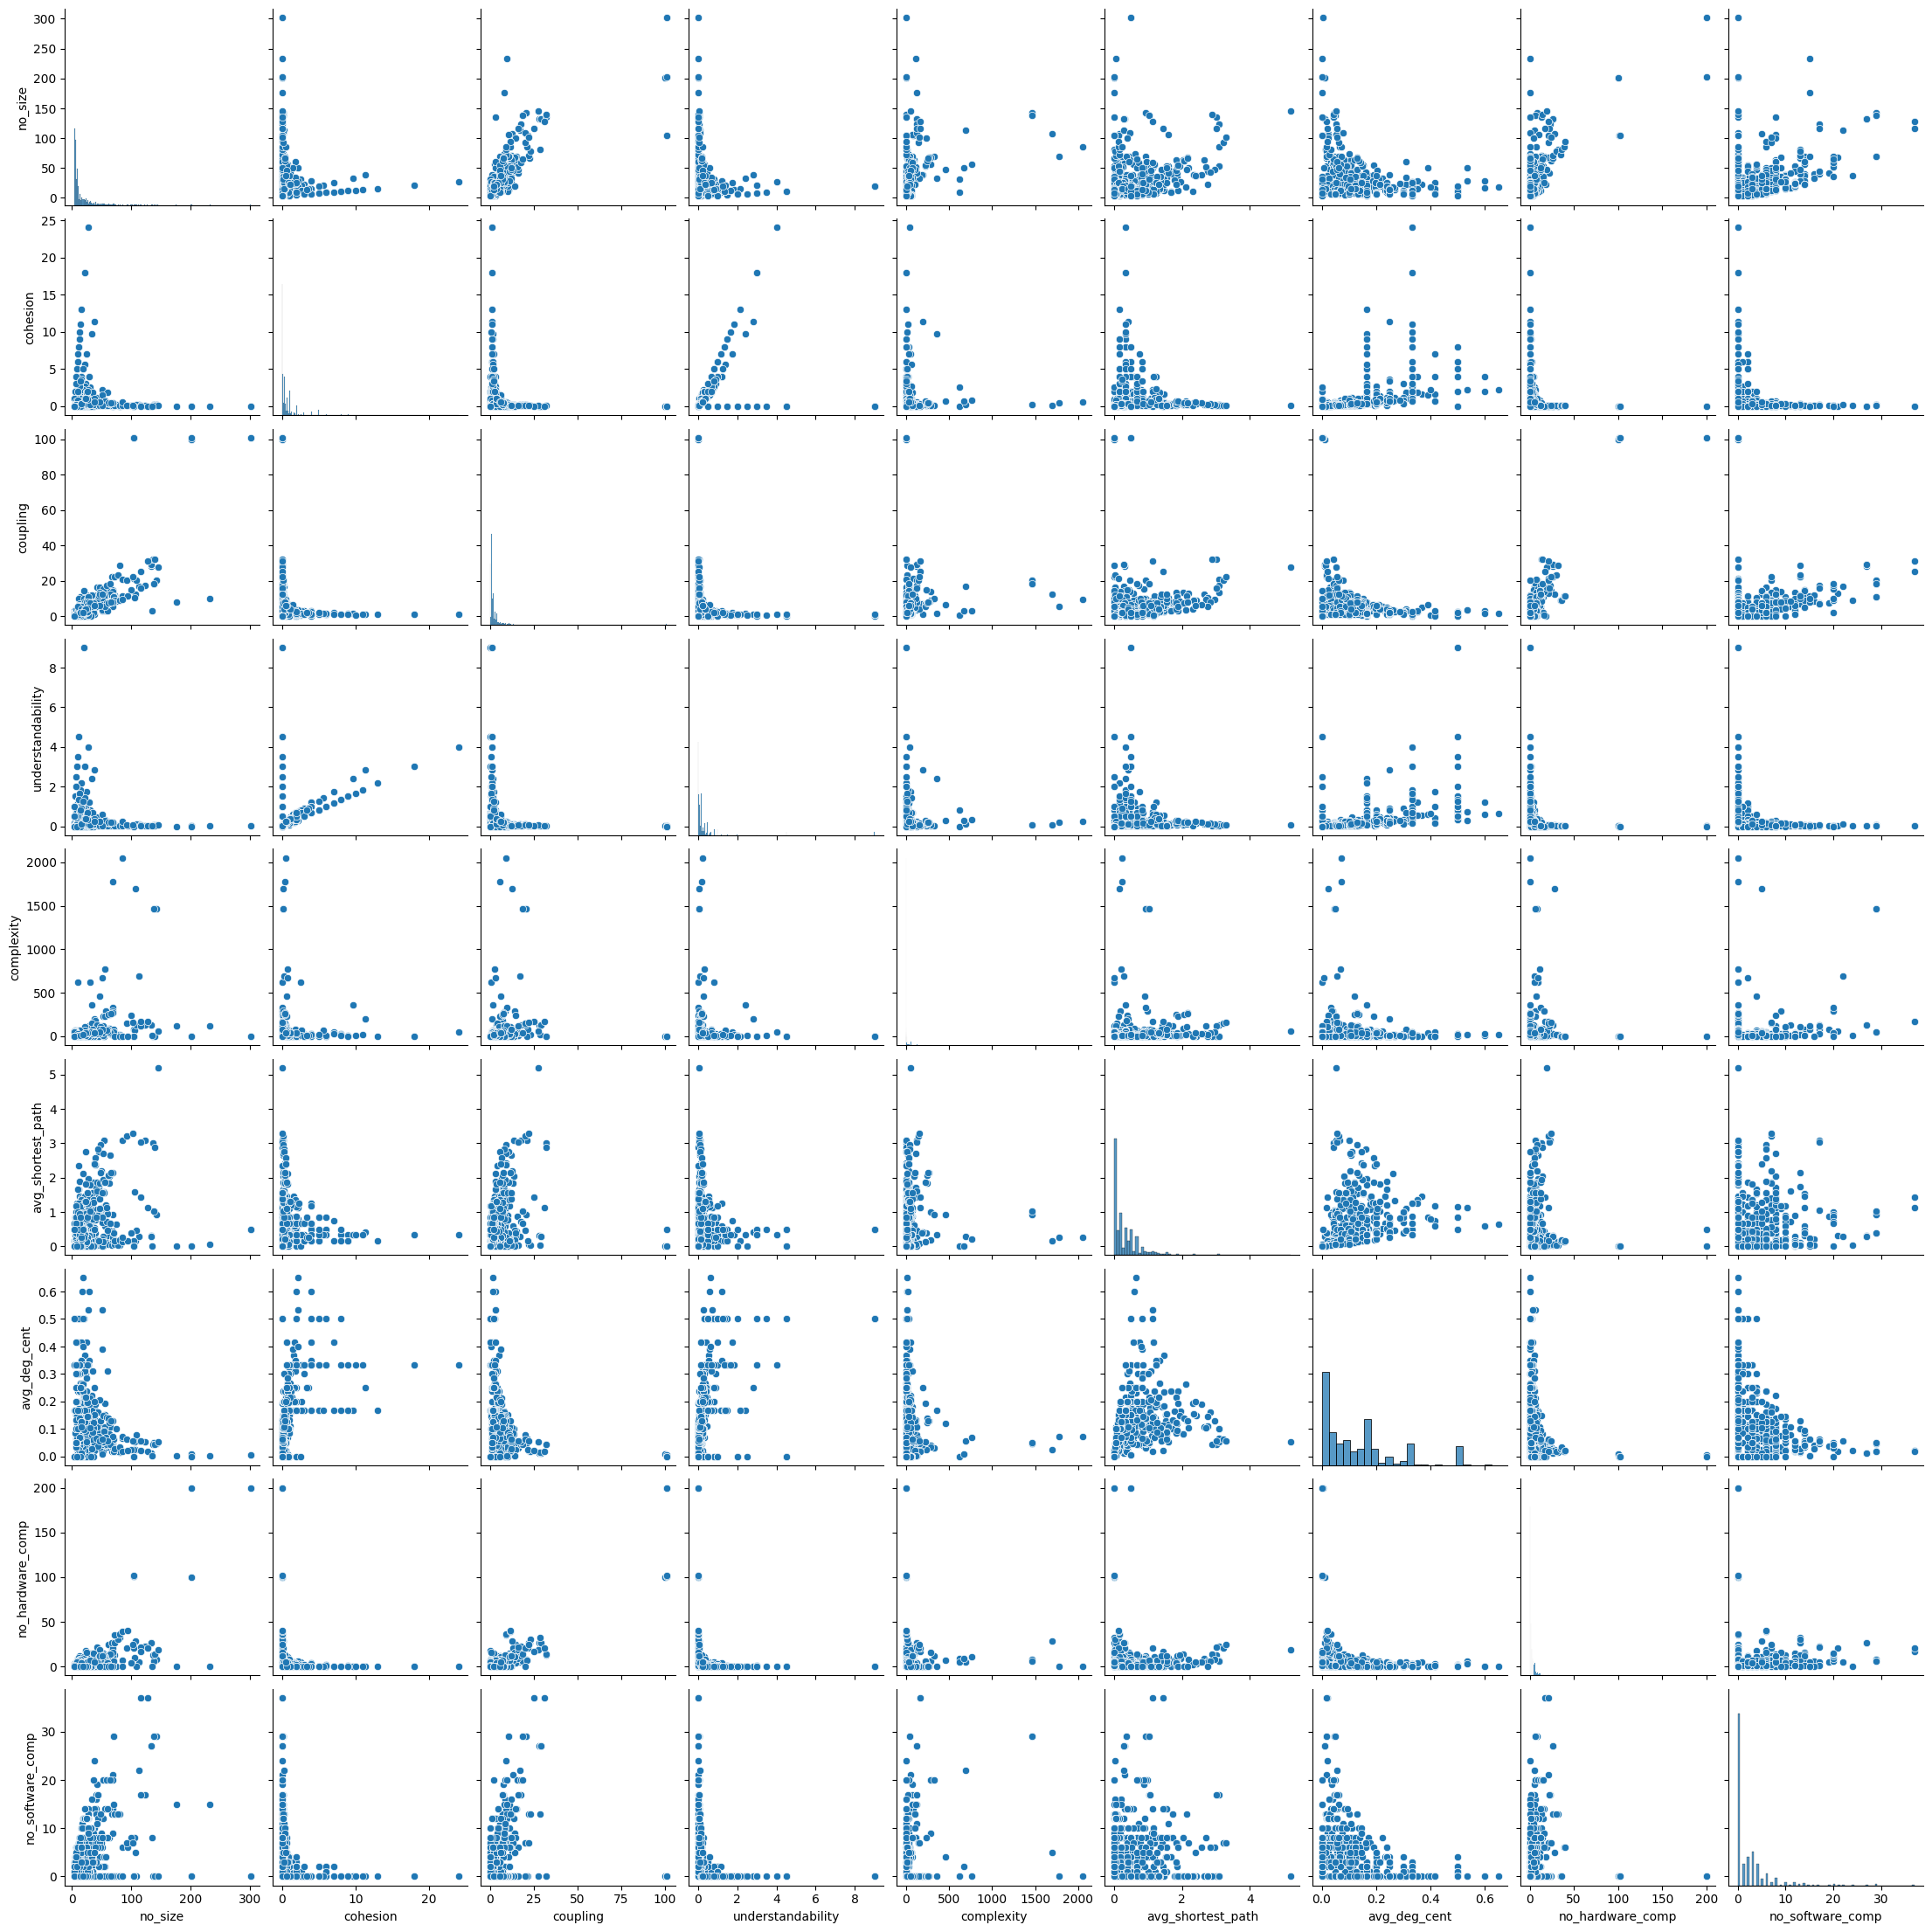

In [31]:
sns.pairplot(df_num[["no_size","cohesion","coupling","understandability","complexity","avg_shortest_path","avg_deg_cent","no_hardware_comp",
                             "no_software_comp"]])


### Correlation Matrix

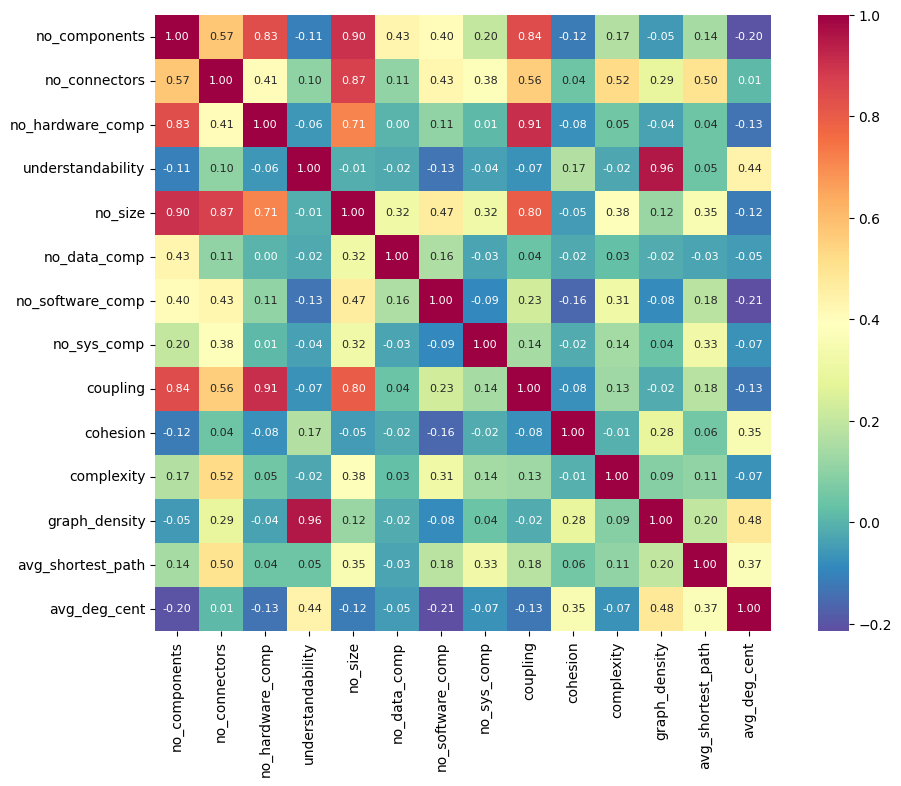

In [32]:
plt.figure(figsize=(12,8))
df_num_corr =  df_num.loc[:, ~df_num.columns.isin(['model_name', "sys_name"])]
corrmat = df_num_corr.corr()
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 8}, 
                 yticklabels=df_num_corr.columns, 
                 xticklabels=df_num_corr.columns, 
                 cmap="Spectral_r")
plt.show()

## Clustering

In [60]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans

In [61]:
X =  df_num.loc[:, df_num.columns.isin(['no_size','complexity','cohesion','coupling'])].values
# X =  df_data.loc[:, df_data.columns.isin(['complexity'])].values

In [62]:
X

array([[56.        , 13.08333346,  0.1       , 54.        ],
       [69.        , 15.08333346,  0.08735632, 54.        ],
       [63.        , 14.08333346,  0.08994709, 54.        ],
       ...,
       [51.        , 12.3380954 ,  0.0942029 , 75.        ],
       [46.        ,  5.91190484,  0.61818182, 51.        ],
       [37.        ,  6.06666672,  0.57777778, 40.        ]])

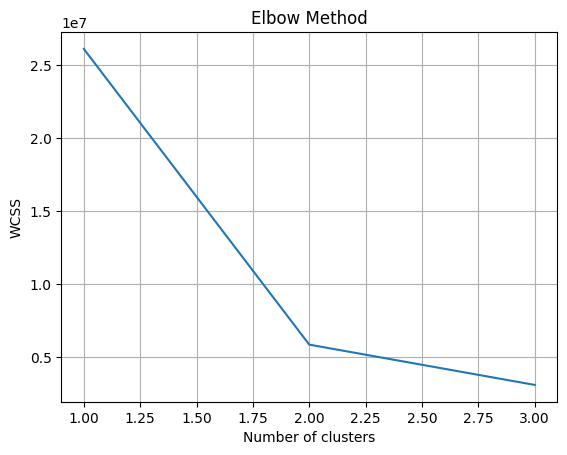

In [63]:
wcss = []
no_clusters = 4
for i in range(1, no_clusters):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the WCSS versus the number of clusters
plt.plot(range(1, no_clusters), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [64]:
model = KMeans(n_clusters=5,n_init="auto")
model.fit(X)

KMeans(n_clusters=5, n_init='auto')

In [65]:
# assign a cluster to each example
labels = model.predict(X)
clusters = unique(labels)
centroids = model.cluster_centers_
print(labels)
print(clusters)

[3 3 3 ... 3 3 3]
[0 1 2 3 4]


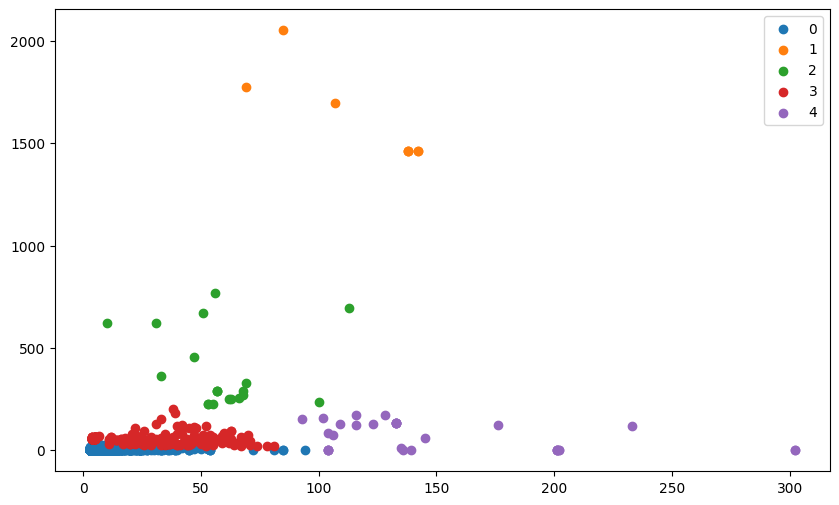

In [71]:
plt.figure(figsize=(10, 6))
for cluster in clusters:
    plt.scatter(df_num[labels == cluster]["no_size"],df_num[labels == cluster]["complexity"], label = cluster)
plt.legend()
plt.show()

In [75]:
df_num[labels == 0]

model_name                              sys_name  \
3     aadlbook::component_definition                integration_i_Instance   
4                   use_myproperties       integration_with_units_Instance   
5                   use_myproperties    integration_without_units_Instance   
6         aadlbook::flows_definition                integration_i_Instance   
8                   Basic_AFDX_Model           Basic_AFDX_Model_i_Instance   
...                              ...                                   ...   
3884                              GS           GroundStation_Impl_Instance   
3892                      Thermostat    ThermostatController_Impl_Instance   
3904                   SynthesisDemo           SynthesisDemo_Impl_Instance   
3910                     SystemModel                Observer_Impl_Instance   
3914                CruiseController  CruiseControllerSystem_Impl_Instance   

      no_components  no_connectors  no_hardware_comp  understandability  \
3              10.0            6.0               3.0           0.066667   
4               3.0            0.0               2.0           0.000000   
5               3.0            0.0               2.0           0.000000   
6              10.0            6.0               3.0           0.066667   
8              33.0           20.0              15.0           0.018939   
...             ...            ...               ...                ...   
3884            8.0            7.0               4.0           0.125000   
3892            3.0            8.0               0.0           1.333333   
3904            2.0            1.0               0.0           0.500000   
3910            4.0           10.0               0.0           0.833333   
3914            4.0           15.0               0.0           1.250000   

      no_size  no_data_comp  no_software_comp  no_sys_comp   coupling  \
3        16.0           0.0               6.0          1.0   5.000000   
4         3.0           0.0               0.0          1.0   0.000000   
5         3.0           0.0               0.0          1.0   0.000000   
6        16.0           0.0               6.0          1.0   5.000000   
8        53.0           0.0              12.0          6.0  13.500000   
...       ...           ...               ...          ...        ...   
3884     15.0           0.0               3.0          1.0   3.966667   
3892     11.0           0.0               0.0          3.0   1.266667   
3904      3.0           0.0               0.0          2.0   0.000000   
3910     14.0           0.0               0.0          4.0   2.216667   
3914     19.0           0.0               0.0          4.0   2.111111   

      cohesion  complexity  graph_density  avg_shortest_path  avg_deg_cent  
3     0.166667         2.0       0.666667           0.444444      0.111111  
4     0.000000         0.0       0.000000           0.000000      0.000000  
5     0.000000         0.0       0.000000           0.000000      0.000000  
6     0.166667         2.0       0.666667           0.444444      0.111111  
8     0.040323         4.0       0.625000           0.017992      0.017992  
...        ...         ...            ...                ...           ...  
3884  0.333333        13.0       1.000000           0.428571      0.107143  
3892  8.000000         8.0       4.000000           0.500000      0.500000  
3904  0.000000         0.0       1.000000           0.500000      0.500000  
3910  3.333333         9.0       3.333333           0.833333      0.250000  
3914  5.000000        18.0       5.000000           0.500000      0.500000  

[1587 rows x 16 columns]

In [74]:
df_num[labels == 1]

model_name                     sys_name  no_components  \
46    Main_Ardupilot  Ardupilot_Map_impl_Instance           35.0   
129              RAP    RAP_GENERIC_IMPL_Instance           36.0   
130              RAP      RAP_LEON_RTEMS_Instance           36.0   
131              RAP        RAP_LEON_ORK_Instance           38.0   
132              RAP       RAP_ERC32_ORK_Instance           38.0   
133              RAP          RAP_Native_Instance           36.0   
491              FCS            FCS_impl_Instance           17.0   
1258             FCS            FCS_Impl_Instance           17.0   

      no_connectors  no_hardware_comp  understandability  no_size  \
46             72.0              28.0           0.060504    107.0   
129           102.0               6.0           0.080952    138.0   
130           102.0               6.0           0.080952    138.0   
131           104.0               8.0           0.073969    142.0   
132           104.0               8.0           0.073969    142.0   
133           102.0               6.0           0.080952    138.0   
491            52.0               0.0           0.191176     69.0   
1258           68.0               0.0           0.250000     85.0   

      no_data_comp  no_software_comp  no_sys_comp   coupling  cohesion  \
46             0.0               5.0          2.0  12.505714  0.128342   
129            0.0              29.0          1.0  18.509280  0.171429   
130            0.0              29.0          1.0  18.509280  0.171429   
131            0.0              29.0          1.0  20.509280  0.156156   
132            0.0              29.0          1.0  20.509280  0.156156   
133            0.0              29.0          1.0  18.509280  0.171429   
491            0.0               0.0         17.0   5.523810  0.433333   
1258           0.0               0.0         17.0   9.362183  0.566667   

      complexity  graph_density  avg_shortest_path  avg_deg_cent  
46        1698.0       2.117647           0.160504      0.025210  
129       1463.0       2.914286           1.034921      0.050000  
130       1463.0       2.914286           1.034921      0.050000  
131       1463.0       2.810811           0.928876      0.046230  
132       1463.0       2.810811           0.928876      0.046230  
133       1463.0       2.914286           1.034921      0.050000  
491       1776.0       3.250000           0.250000      0.073529  
1258      2052.0       4.250000           0.250000      0.073529

In [76]:
df_num[labels == 2]

model_name  \
69                               Boards::ArduImu   
74                                           DMS   
93                                      RAP_Code   
111                            Boards::Ardupilot   
112                              Boards::Arduino   
115                                        ADIRU   
116                                        ADIRU   
117                                        ADIRU   
118                                        ADIRU   
123                                         AOCS   
152                                     Robot_LF   
455                            integration::main   
556   TransportAircraftOperationalSystem_Generic   
641              TransportAircraftSystem_Generic   
1233                                         FCC   
3862                               DeliveryDrone   
3864                               DeliveryDrone   
3871                               DeliveryDrone   
3873                               DeliveryDrone   
3891                               DeliveryDrone   

                                               sys_name  no_components  \
69                                ArduImu_impl_Instance           10.0   
74                         door_management_imp_Instance           12.0   
93                                  RAP_Native_Instance           28.0   
111                             Ardupilot_impl_Instance           12.0   
112                           Duemilanove_impl_Instance            6.0   
115                                 ADIRU_impl_Instance           27.0   
116                                 ADIRU_DeOS_Instance           27.0   
117                           ADIRU_VxWorks653_Instance           27.0   
118                                 ADIRU_EMV2_Instance           33.0   
123                        AOCS_Subsystem_impl_Instance           26.0   
152                      Line_Follower_Robot_i_Instance           12.0   
455                                  main_impl_Instance           47.0   
556   AirTransportOperationalSystem_multipassenger_I...           19.0   
641   AirTransportOperationalSystem_multipassenger_I...           19.0   
1233                                  FCC_Impl_Instance            4.0   
3862                  DeliveryDroneSystem_Impl_Instance           17.0   
3864                  DeliveryDroneSystem_Impl_Instance           17.0   
3871                  DeliveryDroneSystem_Impl_Instance           13.0   
3873                  DeliveryDroneSystem_Impl_Instance           16.0   
3891                  DeliveryDroneSystem_Impl_Instance           17.0   

      no_connectors  no_hardware_comp  understandability  no_size  \
69              0.0               9.0           0.000000     10.0   
74             35.0               7.0           0.265152     47.0   
93             85.0               5.0           0.112434    113.0   
111            44.0              11.0           0.333333     56.0   
112            25.0               5.0           0.833333     31.0   
115            30.0               6.0           0.042735     57.0   
116            30.0               6.0           0.042735     57.0   
117            30.0               6.0           0.042735     57.0   
118            36.0              12.0           0.034091     69.0   
123            42.0              16.0           0.064615     68.0   
152            39.0               9.0           0.295455     51.0   
455            53.0               4.0           0.024514    100.0   
556            34.0               6.0           0.099415     53.0   
641            34.0               6.0           0.099415     53.0   
1233           29.0               0.0           2.416667     33.0   
3862           51.0               0.0           0.187500     68.0   
3864           46.0               1.0           0.169118     63.0   
3871           42.0               0.0           0.269231     55.0   
3873           46.0               0.0           0.191667     62.0   
3891      

In [77]:
df_num[labels == 3]

model_name                           sys_name  no_components  \
0     aadlbook::integration    integration_functional_Instance           26.0   
1     aadlbook::integration    integration_variation1_Instance           31.0   
2     aadlbook::integration    integration_variation2_Instance           29.0   
37    GAIA::Implementations   gaia_first_architecture_Instance           32.0   
38    GAIA::Implementations  gaia_second_architecture_Instance           33.0   
...                     ...                                ...            ...   
3894                    UAS                  UAS_Impl_Instance           25.0   
3913               CASE_Toy         UAVToySystem_Impl_Instance            7.0   
3915                    UAS                  UAS_Impl_Instance           25.0   
3917             HawkeyeUAV            UAVSystem_Impl_Instance           12.0   
3920                     MC      MissionComputer_Impl_Instance           11.0   

      no_connectors  no_hardware_comp  understandability  no_size  \
0              30.0              11.0           0.046154     56.0   
1              38.0              16.0           0.040860     69.0   
2              34.0              14.0           0.041872     63.0   
37             35.0              21.0           0.035282     67.0   
38             29.0              24.0           0.027462     62.0   
...             ...               ...                ...      ...   
3894           22.0              12.0           0.036667     47.0   
3913           16.0               0.0           0.380952     23.0   
3915           26.0              12.0           0.043333     51.0   
3917           34.0               0.0           0.257576     46.0   
3920           26.0               5.0           0.236364     37.0   

      no_data_comp  no_software_comp  no_sys_comp   coupling  cohesion  \
0              0.0              14.0          1.0  13.083333  0.100000   
1              0.0              14.0          1.0  15.083333  0.087356   
2              0.0              14.0          1.0  14.083333  0.089947   
37             0.0               0.0         11.0  15.105556  0.075269   
38             0.0               0.0          9.0  14.566667  0.058468   
...            ...               ...          ...        ...       ...   
3894           0.0               8.0          5.0  12.338095  0.079710   
3913           0.0               0.0          7.0   3.933333  1.066667   
3915           0.0               8.0          5.0  12.338095  0.094203   
3917           0.0               0.0         12.0   5.911905  0.618182   
3920           0.0               5.0          1.0   6.066667  0.577778   

      complexity  graph_density  avg_shortest_path  avg_deg_cent  
0           54.0       1.200000           0.580000      0.055385  
1           54.0       1.266667           0.448387      0.047312  
2           54.0       1.214286           0.474138      0.049261  
37          67.0       1.129032           0.313508      0.045363  
38          37.0       0.906250           0.063447      0.035038  
...          ...            ...                ...           ...  
3894        75.0       0.916667           1.385000      0.055000  
3913        41.0       2.666667           1.309524      0.214286  
3915        75.0       1.083333           1.553333      0.061667  
3917        51.0       3.090909           1.090909      0.204545  
3920        40.0       2.600000           2.390909      0.200000  

[215 rows x 16 columns]

In [78]:
df_num[labels == 4]

model_name  \
124                     paparazzi_system   
125                     paparazzi_system   
126                     paparazzi_system   
127                     paparazzi_system   
128                     paparazzi_system   
153                     GAIA::Validation   
159   aaspe::case_study::aumotive::prius   
160   aaspe::case_study::aumotive::prius   
163           savi::afe62s2::integration   
318                                  wbs   
330                        CommandSystem   
650                            array_ind   
651                            array_ind   
652                            array_ind   
653                            array_ind   
654                            array_ind   
774               array_ind_featuregroup   
775               array_ind_featuregroup   
776               array_ind_featuregroup   
777               array_ind_featuregroup   
778               array_ind_featuregroup   
779               array_ind_featuregroup   
780               array_ind_featuregroup   
842                                  uas   
1209                        ULB_aircraft   
1220                                  AS   
1275                                 TOP   
1365                                 UAV   
1477                    Mission_Software   
1611                     MissionSoftware   
1616                    Mission_Software   
3599                                 UAS   

                                               sys_name  no_components  \
124                      paparazzi_basic_archi_Instance           76.0   
125                              airborne_impl_Instance           75.0   
126          paparazzi_PnP_tasks_interruptions_Instance           76.0   
127           paparazzi_PP_tasks_interruptions_Instance           76.0   
128        paparazzi_PP_tasks_AP_interruptions_Instance           76.0   
153                            Gaia_Validation_Instance           52.0   
159                           prius_model_2014_Instance           46.0   
160                           prius_model_2010_Instance           47.0   
163                                     main_i_Instance           47.0   
318                              wbs_federated_Instance           54.0   
330                         CommandSystem_inst_Instance           29.0   
650                            sensor_array_i1_Instance          101.0   
651                                    main_i1_Instance          103.0   
652                                    main_i2_Instance          202.0   
653                                    main_i3_Instance          104.0   
654                                    main_i4_Instance          202.0   
774                          sensor_array_fg_i_Instance          101.0   
775                         sensor_array_fg2_i_Instance          101.0   
776                            sensor_array_i1_Instance          101.0   
777                                    main_i1_Instance          103.0   
778                                    main_i2_Instance          202.0   
779                                    main_i3_Instance          104.0   
780                                    main_i4_Instance          202.0   
842                                    UAS_ulb_Instance           43.0   
1209                                  ulb_impl_Instance           40.0   
1220      Avionics_System_Avionics_System_Impl_Instance           70.0   
1275  Complete_Avionics_System_Complete_Avionics_Sys...           79.0   
1365                                  UAV_Impl_Instance           33.0   
1477                             Software_Impl_Instance          166.0   
1611                                     top_i_Instance          117.0   
1616                             Software_Impl_Instance          179.0   
3599                                  UAS_Impl_Instance           38.0   

      no_connectors  no_hardware_comp  understandability  no_size  \
124            57.0              26.0           0.010000    133.0